### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get Data

In [2]:
train = pd.read_hdf('../wip-data/train.h5')
SalePrice = pd.read_hdf('../wip-data/SalePrice.h5')

### Investigating Heteroscedacity

To identify heteroscedacity of the dependent variable, <code>SalePrice</code>, we fit a linear model to the <i>train</i> dataset. We use the resulting model to predict values for the depended variable, <code>SalePrice_hat</code>, calculate the residuals and then plot the studentized residuals versus the values of <code>SalePrice</code>. Additionally we also plot the Q-Q plot for the studentized residuals. The shape of the resulting plots are a strong indicator of the presence of heteroscedacity.

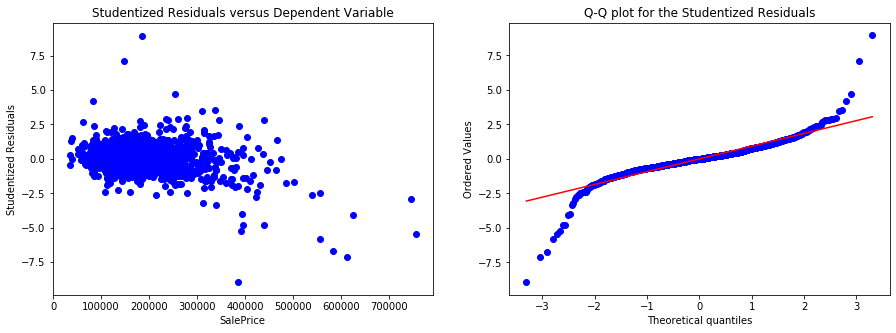

In [3]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

lm = LinearRegression().fit(train, SalePrice)
SalePrice_hat = lm.predict(train)
res = (SalePrice_hat - SalePrice)/np.std(SalePrice_hat - SalePrice)

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.scatter(SalePrice, res, color = 'blue')
plt.xlabel('SalePrice')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals versus Dependent Variable')

plt.subplot(1,2,2)
stats.probplot(res, dist="norm", plot=plt)
plt.title('Q-Q plot for the Studentized Residuals')

plt.show()


The plot on the left shows that as the value of the dependent variable, <code>SalePrice</code>, increases so does the variance in the values of the studentized residuals. The plot on the right confirms this hypothesis as we see that that the values of the studentized residuals start deviating from the theoretical normal distribution as early as (+)(-)2<i>sigma</i>. This is a strong indicator that the train dataset is heteroscedastic.

To eliminate this heteroscedacity, we transform the dependent variable to its log value, fit a linear model to this new dependent variable and then check if this transformation helps eliminate the heteroscedacity by plotting the values of the new studentized residuals to the values of the new dependent variable.


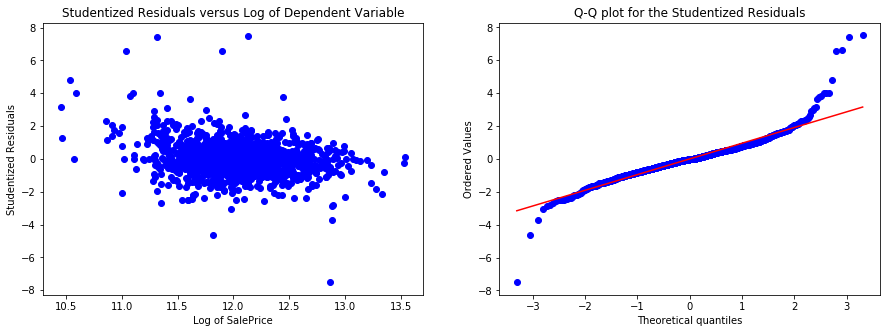

In [4]:
SP_log = np.log(SalePrice)

lm = LinearRegression().fit(train, SP_log)
SP_log_hat = lm.predict(train)
res = (SP_log_hat - SP_log)/np.std(SP_log_hat - SP_log)

plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.scatter(SP_log, res, color = 'blue')
plt.xlabel('Log of SalePrice')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals versus Log of Dependent Variable')

plt.subplot(1,2,2)
stats.probplot(res, dist="norm", plot=plt)
plt.title('Q-Q plot for the Studentized Residuals')

plt.show()

Unfortunately the log transformation of the dependent variable fails to eliminate the heteroscedacity in the <i>train</i> dataset. The plot on the right above indicates that the deviation of the studentized residuals from the theoretical normal distribution worsens towards the right tail of the distribution.

A linear model is unlikely to be a good descriptor of the <i>train</i> dataset. We will have to introduce non-linearity in the model for the independent variables to better predict the dependent variable.

To help compare the performance of different models, it would be a good idea to establish a baseline evaluation metric value. We choose the <b>root mean sum of squared errors (RMSE)</b> as the performance metric and its baseline value as the one derived from a non-penalized regression model.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, SalePrice, random_state = 1970)
model = LinearRegression().fit(X_train, y_train)
val_error = model.score(X_val, y_val)
print('The RMSE for a non-penalized regression model =', (val_error**1/2).round(5))


The RMSE for a non-penalized regression model = 0.05659
